# Proyecto de Inteligencia Artificial

**Autores:** 
- Ian Coto 
- Rafael Vargas

---

## 1. Fase de entendimiento del negocio

### i. Objetivos del negocio

El objetivo principal es **analizar los datos de pitcheo de la MLB (Major League Baseball) del periodo 2015-2024** para entender patrones, tendencias y características que permitan:

1. **Identificar factores clave del desempeño de pitchers**: Analizar qué variables están más correlacionadas con el éxito en el pitcheo.
2. **Predecir resultados de lanzamientos**: Desarrollar modelos que puedan anticipar el resultado de un pitch basándose en características del lanzamiento.
3. **Clasificar estilos de pitcheo**: Agrupar pitchers según sus características y estrategias de lanzamiento.
4. **Optimizar estrategias**: Proporcionar insights que puedan ayudar a equipos y jugadores a mejorar su rendimiento.

### ii. Criterios de éxito (en términos del negocio)

1. **Comprensión profunda de los datos**: Identificar al menos 5 variables clave que impactan significativamente los resultados.
2. **Modelos predictivos precisos**: Alcanzar una precisión mínima del 70% en la predicción de resultados de lanzamientos.
3. **Segmentación clara**: Identificar al menos 3-5 clusters distintos de estilos de pitcheo con características interpretables.
4. **Insights accionables**: Generar recomendaciones basadas en datos que puedan ser aplicadas por equipos y jugadores.

---

## 2. Fase de entendimiento de los datos

### i. Objetivos de minería de datos

1. **Análisis exploratorio exhaustivo**: Realizar un análisis estadístico completo de todas las variables relevantes del dataset.
2. **Identificación de patrones**: Descubrir relaciones entre variables y tendencias temporales en los datos.
3. **Detección de anomalías**: Identificar valores atípicos y datos de baja calidad que requieran limpieza.
4. **Feature engineering**: Crear nuevas variables derivadas que puedan mejorar los modelos predictivos.
5. **Preparación de datos**: Limpiar y transformar los datos para su uso en modelos de machine learning.

### ii. Criterios de éxito (desde la perspectiva de la minería de datos)

1. **Calidad de datos**: Lograr un dataset con menos del 5% de valores faltantes en variables clave.
2. **Visualizaciones informativas**: Crear al menos 10 visualizaciones que revelen insights importantes.
3. **Correlaciones significativas**: Identificar variables con correlación |r| > 0.3 con las variables objetivo.
4. **Dataset balanceado**: Asegurar representación adecuada de diferentes tipos de lanzamientos y resultados.
5. **Documentación completa**: Mantener registro detallado de todas las transformaciones y decisiones tomadas.

---

## 3. Fase de entendimiento de los datos

### i. Lista de fuentes de datos requeridos

1. **Statcast MLB (2015-2024)**: Datos pitch-by-pitch de todos los juegos de la Major League Baseball.

### ii. Método de acceso (para cada fuente de datos indicar si se obtiene de Internet, de un sistema interno, etc.)

1. **Statcast MLB**: 
   - **Método**: Descarga desde Internet vía API
   - **Herramienta**: Librería `pybaseball` (wrapper de la API de Baseball Savant)
   - **Formato**: CSV
   - **Actualización**: Los datos se descargan y almacenan localmente en `data/statcast_raw_data/`

### iii. Descripción de los datos (describa las principales variables a utilizar, indique también cantidad de registros y variables)

*Se calculará en las siguientes celdas*

### iv. Exploración de los datos (al menos 3 variables importantes, puede incluir estadísticos y análisis de la distribución de los datos, visualizaciones, etc). Utilice su creatividad para obtener información valiosa de los datos con los que está trabajando.

*Se desarrollará en las siguientes celdas*

### v. Calidad de datos (debe constar vía código la revisión de aspectos de calidad de datos para todas las variables a utilizar)

*Se analizará en las siguientes celdas*

---

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
import os

# Configuración
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Para gráficos de mejor calidad
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

print("Librerías importadas correctamente")

Librerías importadas correctamente


---

## Carga de datos

In [2]:
# Definir rutas
data_path = Path('../data/statcast_raw_data')

# Listar archivos disponibles
available_files = sorted(list(data_path.glob('statcast_*.csv')))
print(f"Archivos encontrados: {len(available_files)}")
for file in available_files:
    size_mb = file.stat().st_size / (1024 * 1024)
    print(f"   - {file.name} ({size_mb:.1f} MB)")

# Cargar el primer año para exploración inicial
if available_files:
    df = pd.read_csv(available_files[0])
    year = available_files[0].stem.split('_')[1]
    print(f"\nDatos de {year} cargados correctamente")
    print(f"   Shape: {df.shape[0]:,} filas × {df.shape[1]} columnas")
else:
    print("No se encontraron archivos de datos. Ejecute primero 02_descarga_datos.ipynb")

Archivos encontrados: 1
   - statcast_2015.csv (365.9 MB)

Datos de 2015 cargados correctamente
   Shape: 712,844 filas × 118 columnas


---

## Descripción general del dataset

In [3]:
# Vista previa de los datos
print("="*80)
print("PRIMERAS 5 FILAS DEL DATASET")
print("="*80)
df.head()

PRIMERAS 5 FILAS DEL DATASET


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,fielder_2,fielder_3,fielder_4,fielder_5,fielder_6,fielder_7,fielder_8,fielder_9,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,attack_angle,attack_direction,swing_path_tilt,intercept_ball_minus_batter_pos_x_inches,intercept_ball_minus_batter_pos_y_inches
0,FF,2015-11-01,96.10,-2.02,6.25,"Davis, Wade",527038,451584,strikeout,called_strike,NaN,NaN,NaN,NaN,13.00,Wilmer Flores called out on strikes.,W,R,R,NYM,KC,S,2.00,NaN,1,2,2015,-0.10,1.43,-0.93,1.62,NaN,624424.00,NaN,2,12,Bot,NaN,NaN,NaN,NaN,NaN,151102_003434,3.14,-140.73,-9.35,-2.03,34.78,-11.71,3.54,1.56,NaN,NaN,NaN,95.40,2463.00,6.40,446277,460077,543333,450314,519058,444876,460086,456715,449181,54.50,NaN,0.00,0.00,1.00,0.00,0.00,NaN,94,6,4-Seam Fastball,2,7,2,7,7,2,2,7,Standard,Strategic,NaN,-0.00,-0.19,NaN,NaN,NaN,0.19,NaN,-5,-5,0.00,0.00,29,23,30,24,1,4,1.00,1.00,NaN,NaN,1.10,0.10,0.10,NaN,NaN,NaN,NaN,NaN,NaN
1,FC,2015-11-01,93.10,-1.66,6.24,"Davis, Wade",527038,451584,NaN,foul,NaN,NaN,NaN,NaN,9.00,Foul,W,R,R,NYM,KC,S,NaN,NaN,1,2,2015,0.50,0.45,0.78,1.55,NaN,624424.00,NaN,2,12,Bot,NaN,NaN,NaN,NaN,NaN,151102_003407,4.99,-136.40,-6.39,5.00,28.84,-25.32,3.54,1.56,NaN,NaN,NaN,92.20,2705.00,5.90,446277,460077,543333,450314,519058,444876,460086,456715,449181,54.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,5,Cutter,2,7,2,7,7,2,2,7,Standard,Strategic,NaN,-0.00,0.00,NaN,NaN,NaN,0.00,NaN,-5,-5,0.00,0.00,29,23,30,24,1,4,1.00,1.00,NaN,NaN,2.21,-0.50,-0.50,NaN,NaN,NaN,NaN,NaN,NaN
2,FF,2015-11-01,97.00,-1.64,6.30,"Davis, Wade",527038,451584,NaN,foul,NaN,NaN,NaN,NaN,14.00,Foul,W,R,R,NYM,KC,S,NaN,NaN,1,2,2015,-0.27,1.18,1.32,2.47,NaN,624424.00,NaN,2,12,Bot,NaN,NaN,NaN,NaN,NaN,151102_003338,8.63,-141.85,-6.83,-5.41,31.55,-15.19,3.54,1.56,NaN,NaN,NaN,96.40,2362.00,6.30,446277,460077,543333,450314,519058,444876,460086,456715,449181,54.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,4,4-Seam Fastball,2,7,2,7,7,2,2,7,Standard,Strategic,NaN,-0.00,0.00,NaN,NaN,NaN,0.00,NaN,-5,-5,0.00,0.00,29,23,30,24,1,4,1.00,1.00,NaN,NaN,1.28,0.27,0.27,NaN,NaN,NaN,NaN,NaN,NaN
3,FC,2015-11-01,93.60,-1.58,6.24,"Davis, Wade",527038,451584,NaN,ball,NaN,NaN,NaN,NaN,14.00,Ball,W,R,R,NYM,KC,B,NaN,NaN,0,2,2015,0.65,0.57,2.92,2.23,NaN,NaN,624424.00,2,12,Bot,NaN,NaN,NaN,NaN,NaN,151102_003312,9.89,-136.60,-5.02,6.08,26.36,-24.25,3.54,1.56,NaN,NaN,NaN,92.80,2724.00,6.00,446277,460077,543333,450314,519058,444876,460086,456715,449181,54.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94,3,Cutter,2,7,2,7,7,2,2,7,Strategic,Strategic,NaN,0.00,0.02,NaN,NaN,NaN,-0.02,NaN,-5,-5,0.00,0.00,29,23,30,24,1,4,1.00,1.00,NaN,NaN,2.06,-0.65,-0.65,NaN,NaN,NaN,NaN,NaN,NaN
4,FF,2015-11-01,97.10,-1.70,6.30,"Davis, Wade",527038,451584,NaN,foul,NaN,NaN,NaN,NaN,5.00,Foul,W,R,R,NYM,KC,S,NaN,NaN,

In [4]:
# Información general del dataset
print("="*80)
print("INFORMACIÓN GENERAL DEL DATASET")
print("="*80)
print(f"\nDimensiones: {df.shape[0]:,} registros × {df.shape[1]} variables")
print(f"Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"\nRango temporal:")
if 'game_date' in df.columns:
    print(f"   Desde: {df['game_date'].min()}")
    print(f"   Hasta: {df['game_date'].max()}")

print("\n" + "="*80)
print("TIPOS DE DATOS")
print("="*80)
print(df.dtypes.value_counts())

print("\n" + "="*80)
print("COLUMNAS DEL DATASET")
print("="*80)
for i, col in enumerate(df.columns, 1):
    print(f"{i:3d}. {col:40s} ({df[col].dtype})")

INFORMACIÓN GENERAL DEL DATASET

Dimensiones: 712,844 registros × 118 variables
Tamaño en memoria: 1202.49 MB

Rango temporal:
   Desde: 2015-04-05
   Hasta: 2015-11-01

TIPOS DE DATOS
float64    66
int64      34
object     18
Name: count, dtype: int64

COLUMNAS DEL DATASET
  1. pitch_type                               (object)
  2. game_date                                (object)
  3. release_speed                            (float64)
  4. release_pos_x                            (float64)
  5. release_pos_z                            (float64)
  6. player_name                              (object)
  7. batter                                   (int64)
  8. pitcher                                  (int64)
  9. events                                   (object)
 10. description                              (object)
 11. spin_dir                                 (float64)
 12. spin_rate_deprecated                     (float64)
 13. break_angle_deprecated                   (float64)
 14. b

---

## Análisis de calidad de datos

ANÁLISIS DE VALORES NULOS

Columnas con valores nulos: 70 de 118

                                 Columna  Nulos  Porcentaje
                  break_angle_deprecated 712844      100.00
                 break_length_deprecated 712844      100.00
                                spin_dir 712844      100.00
                    spin_rate_deprecated 712844      100.00
                                  umpire 712844      100.00
                     tfs_zulu_deprecated 712844      100.00
                          tfs_deprecated 712844      100.00
                               bat_speed 712844      100.00
                            swing_length 712844      100.00
                               arm_angle 712844      100.00
intercept_ball_minus_batter_pos_x_inches 712844      100.00
intercept_ball_minus_batter_pos_y_inches 712844      100.00
                         swing_path_tilt 712844      100.00
                               spin_axis 712844      100.00
                            attack

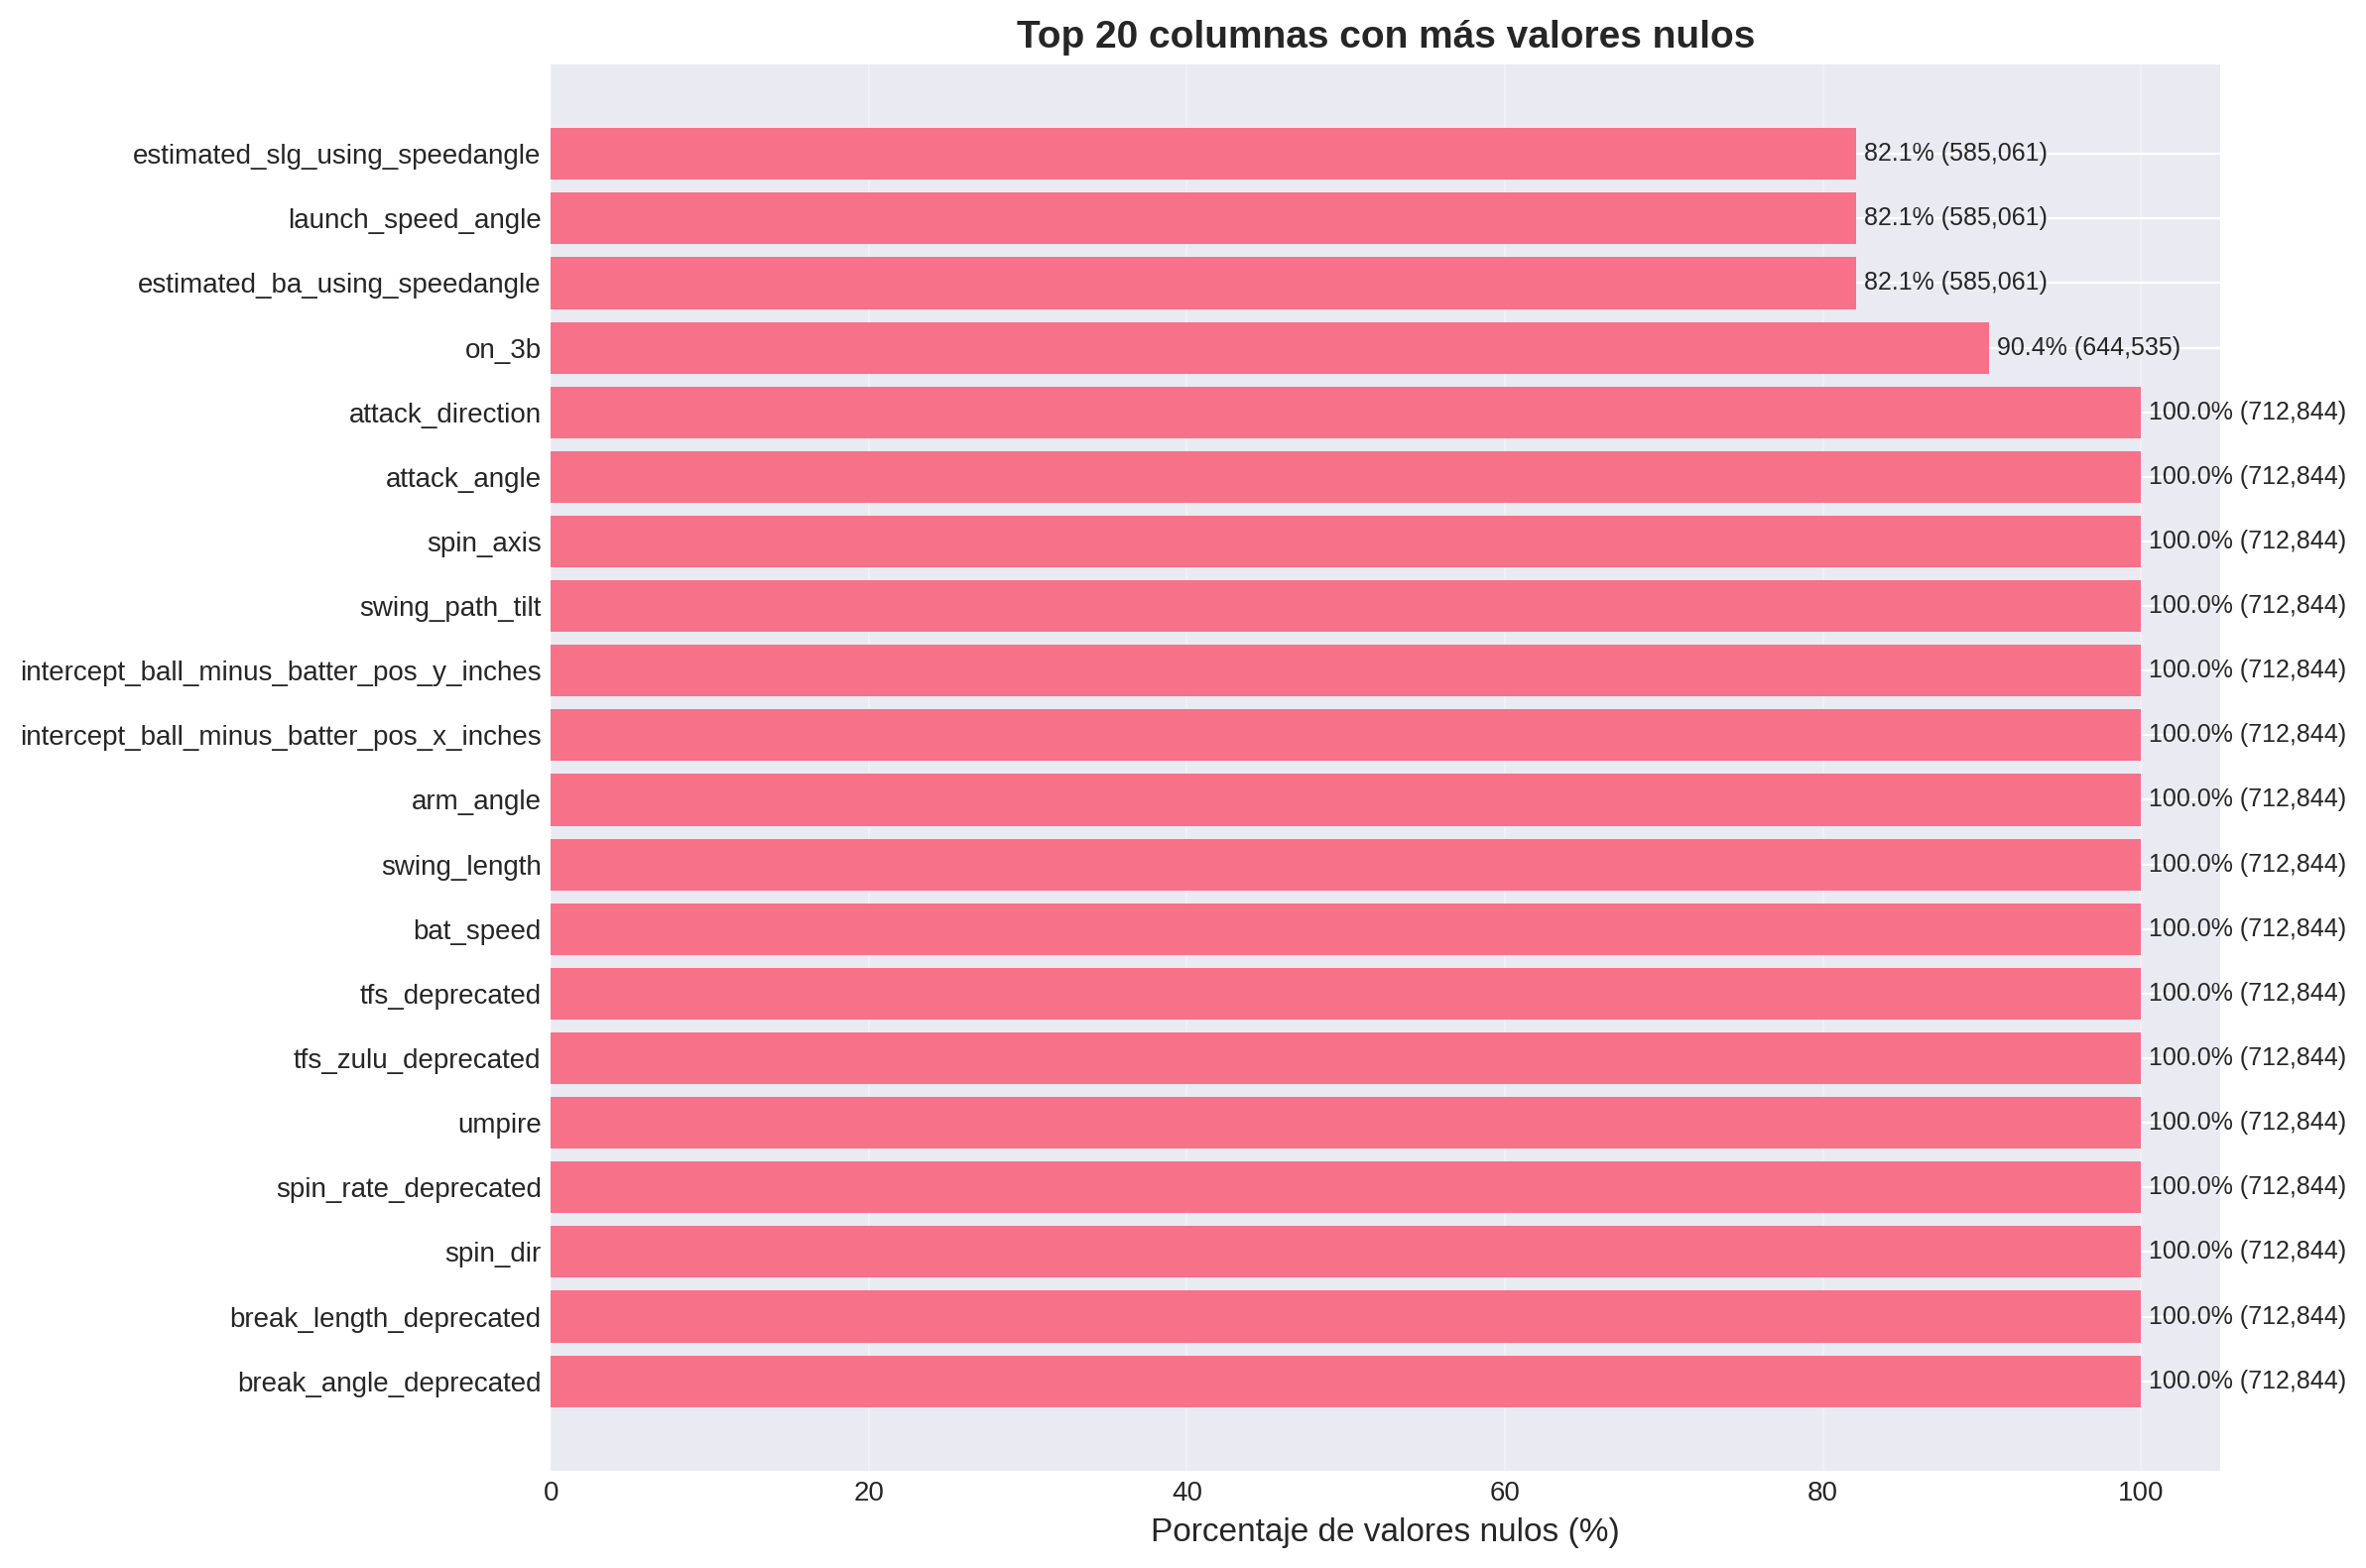

In [5]:
# Análisis de valores nulos
print("="*80)
print("ANÁLISIS DE VALORES NULOS")
print("="*80)

null_counts = df.isnull().sum()
null_percentages = (null_counts / len(df)) * 100

null_df = pd.DataFrame({
    'Columna': null_counts.index,
    'Nulos': null_counts.values,
    'Porcentaje': null_percentages.values
}).sort_values('Nulos', ascending=False)

# Mostrar solo columnas con valores nulos
null_df_filtered = null_df[null_df['Nulos'] > 0]
print(f"\nColumnas con valores nulos: {len(null_df_filtered)} de {len(df.columns)}\n")
print(null_df_filtered.to_string(index=False))

# Visualización
fig, ax = plt.subplots(figsize=(12, 8))
top_nulls = null_df_filtered.head(20)
if len(top_nulls) > 0:
    bars = ax.barh(range(len(top_nulls)), top_nulls['Porcentaje'])
    ax.set_yticks(range(len(top_nulls)))
    ax.set_yticklabels(top_nulls['Columna'])
    ax.set_xlabel('Porcentaje de valores nulos (%)', fontsize=12)
    ax.set_title('Top 20 columnas con más valores nulos', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir valores en las barras
    for i, (val, count) in enumerate(zip(top_nulls['Porcentaje'], top_nulls['Nulos'])):
        ax.text(val + 0.5, i, f'{val:.1f}% ({count:,})', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
else:
    print("\n¡No hay valores nulos en el dataset!")

In [6]:
# Análisis de duplicados
print("="*80)
print("ANÁLISIS DE DUPLICADOS")
print("="*80)

duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados:,} ({duplicados/len(df)*100:.2f}%)")

if duplicados > 0:
    print("\nEjemplo de filas duplicadas:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("\nNo se encontraron filas completamente duplicadas")

ANÁLISIS DE DUPLICADOS

Filas duplicadas: 0 (0.00%)

No se encontraron filas completamente duplicadas


---

## Estadísticas descriptivas - Variables numéricas

In [7]:
# Identificar variables numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Variables numéricas: {len(numeric_cols)}")

# Estadísticas descriptivas
print("\n" + "="*80)
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE")
print("="*80)

# Seleccionar variables clave de pitcheo
key_numeric_vars = [
    'release_speed', 'release_pos_x', 'release_pos_z',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
    'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
    'effective_speed', 'release_spin_rate', 'release_extension',
    'launch_speed', 'launch_angle', 'hit_distance_sc'
]

# Filtrar solo las que existan en el dataset
key_numeric_vars = [col for col in key_numeric_vars if col in df.columns]

if key_numeric_vars:
    stats_df = df[key_numeric_vars].describe().T
    stats_df['missing'] = df[key_numeric_vars].isnull().sum()
    stats_df['missing_pct'] = (stats_df['missing'] / len(df)) * 100
    print(stats_df)

Variables numéricas: 100

ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS CLAVE
                      count    mean    std     min     25%     50%     75%  \
release_speed     712779.00   88.76   6.07   36.10   84.80   90.10   93.30   
release_pos_x     712166.00   -0.75   1.87   -5.08   -2.08   -1.40    0.93   
release_pos_z     712166.00    6.01   0.47   -3.19    5.76    6.03    6.31   
pfx_x             712166.00   -0.09   0.89   -2.97   -0.85   -0.23    0.64   
pfx_z             712166.00    0.71   0.75   -2.50    0.30    0.86    1.27   
plate_x           712169.00   -0.03   0.92   -9.22   -0.64   -0.03    0.58   
plate_z           712169.00    2.25   0.95   -4.21    1.65    2.25    2.86   
vx0               712166.00    2.03   6.16  -23.33   -2.53    3.73    6.53   
vy0               712166.00 -129.96   8.79 -152.78 -136.59 -131.87 -124.13   
vz0               712166.00   -3.75   3.30  -17.97   -6.01   -3.98   -1.73   
ax                712169.00   -1.80  10.74  -35.75  -10.81   -

---

## Análisis de variables categóricas

In [8]:
# Identificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Variables categóricas: {len(categorical_cols)}\n")

# Analizar variables categóricas clave
key_categorical_vars = [
    'pitch_type', 'events', 'description', 'zone', 'stand', 'p_throws',
    'type', 'bb_type', 'if_fielding_alignment', 'of_fielding_alignment'
]

key_categorical_vars = [col for col in key_categorical_vars if col in df.columns]

print("="*80)
print("DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS CLAVE")
print("="*80)

for var in key_categorical_vars[:5]:  # Mostrar las primeras 5
    print(f"\n{var.upper()}")
    print("-" * 80)
    value_counts = df[var].value_counts()
    value_counts_pct = df[var].value_counts(normalize=True) * 100
    
    result = pd.DataFrame({
        'Frecuencia': value_counts,
        'Porcentaje': value_counts_pct
    })
    
    print(result.head(10))
    print(f"\nValores únicos: {df[var].nunique()}")
    print(f"Valores nulos: {df[var].isnull().sum()} ({df[var].isnull().sum()/len(df)*100:.2f}%)")

Variables categóricas: 18

DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS CLAVE

PITCH_TYPE
--------------------------------------------------------------------------------
            Frecuencia  Porcentaje
pitch_type                        
FF              252722       35.49
SI              152070       21.35
SL              101417       14.24
CH               75289       10.57
CU               53705        7.54
FC               40771        5.72
KC               16456        2.31
FS               11157        1.57
KN                3800        0.53
IN                3248        0.46

Valores únicos: 19
Valores nulos: 675 (0.09%)

EVENTS
--------------------------------------------------------------------------------
                           Frecuencia  Porcentaje
events                                           
field_out                       76785       41.14
strikeout                       37956       20.33
single                          28376       15.20
walk                          

---

## Exploración de variables clave

### Variable 1: Velocidad del lanzamiento (release_speed)

In [ ]:
if 'release_speed' in df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Histograma
    axes[0, 0].hist(df['release_speed'].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[0, 0].set_xlabel('Velocidad (mph)', fontsize=11)
    axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
    axes[0, 0].set_title('Distribución de velocidad de lanzamiento', fontsize=12, fontweight='bold')
    axes[0, 0].axvline(df['release_speed'].mean(), color='red', linestyle='--', 
                       label=f'Media: {df["release_speed"].mean():.2f}')
    axes[0, 0].axvline(df['release_speed'].median(), color='green', linestyle='--', 
                       label=f'Mediana: {df["release_speed"].median():.2f}')
    axes[0, 0].legend()
    axes[0, 0].grid(alpha=0.3)
    
    # Box plot
    axes[0, 1].boxplot(df['release_speed'].dropna(), vert=True)
    axes[0, 1].set_ylabel('Velocidad (mph)', fontsize=11)
    axes[0, 1].set_title('Box Plot - Velocidad de lanzamiento', fontsize=12, fontweight='bold')
    axes[0, 1].grid(alpha=0.3)
    
    # Velocidad por tipo de pitch
    if 'pitch_type' in df.columns:
        pitch_speed = df.groupby('pitch_type')['release_speed'].mean().sort_values(ascending=False)
        axes[1, 0].barh(range(len(pitch_speed)), pitch_speed.values)
        axes[1, 0].set_yticks(range(len(pitch_speed)))
        axes[1, 0].set_yticklabels(pitch_speed.index)
        axes[1, 0].set_xlabel('Velocidad promedio (mph)', fontsize=11)
        axes[1, 0].set_title('Velocidad promedio por tipo de lanzamiento', fontsize=12, fontweight='bold')
        axes[1, 0].grid(axis='x', alpha=0.3)
        
        # Añadir valores
        for i, val in enumerate(pitch_speed.values):
            axes[1, 0].text(val + 0.5, i, f'{val:.1f}', va='center', fontsize=9)
    
    # Q-Q plot (normalidad)
    from scipy import stats
    stats.probplot(df['release_speed'].dropna(), dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot - Velocidad de lanzamiento', fontsize=12, fontweight='bold')
    axes[1, 1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estadísticas
    print("="*80)
    print("ESTADÍSTICAS - VELOCIDAD DE LANZAMIENTO")
    print("="*80)
    print(f"Media:               {df['release_speed'].mean():.2f} mph")
    print(f"Mediana:             {df['release_speed'].median():.2f} mph")
    print(f"Desviación estándar: {df['release_speed'].std():.2f} mph")
    print(f"Mínimo:              {df['release_speed'].min():.2f} mph")
    print(f"Máximo:              {df['release_speed'].max():.2f} mph")
    print(f"Rango:               {df['release_speed'].max() - df['release_speed'].min():.2f} mph")
    print(f"Coef. variación:     {(df['release_speed'].std()/df['release_speed'].mean())*100:.2f}%")
else:
    print("La variable 'release_speed' no está disponible en el dataset")

---

### Variable 2: Tipo de lanzamiento (pitch_type)

In [ ]:
if 'pitch_type' in df.columns:
    # Diccionario de nombres de tipos de pitcheo
    pitch_names = {
        'FF': 'Four-Seam Fastball',
        'SI': 'Sinker',
        'FC': 'Cutter',
        'SL': 'Slider',
        'CH': 'Changeup',
        'CU': 'Curveball',
        'FS': 'Splitter',
        'KC': 'Knuckle Curve',
        'KN': 'Knuckleball',
        'EP': 'Eephus',
        'FO': 'Forkball',
        'SC': 'Screwball',
        'FA': 'Fastball',
        'ST': 'Sweeper',
        'SV': 'Slurve'
    }
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Gráfico de barras
    pitch_counts = df['pitch_type'].value_counts()
    axes[0, 0].bar(range(len(pitch_counts)), pitch_counts.values)
    axes[0, 0].set_xticks(range(len(pitch_counts)))
    axes[0, 0].set_xticklabels(pitch_counts.index, rotation=45)
    axes[0, 0].set_ylabel('Frecuencia', fontsize=11)
    axes[0, 0].set_title('Distribución de tipos de lanzamiento', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for i, val in enumerate(pitch_counts.values):
        axes[0, 0].text(i, val + max(pitch_counts.values)*0.01, f'{val:,}', 
                        ha='center', va='bottom', fontsize=9)
    
    # Gráfico de pastel (top 8)
    top_pitches = pitch_counts.head(8)
    otros = pitch_counts.iloc[8:].sum() if len(pitch_counts) > 8 else 0
    if otros > 0:
        top_pitches['Otros'] = otros
    
    axes[0, 1].pie(top_pitches.values, labels=top_pitches.index, autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Proporción de tipos de lanzamiento (Top 8)', fontsize=12, fontweight='bold')
    
    # Velocidad vs Spin Rate por tipo de pitch
    if 'release_speed' in df.columns and 'release_spin_rate' in df.columns:
        for pitch_type in pitch_counts.head(8).index:
            subset = df[df['pitch_type'] == pitch_type]
            axes[1, 0].scatter(subset['release_speed'], subset['release_spin_rate'], 
                             alpha=0.3, s=10, label=pitch_type)
        
        axes[1, 0].set_xlabel('Velocidad (mph)', fontsize=11)
        axes[1, 0].set_ylabel('Spin Rate (rpm)', fontsize=11)
        axes[1, 0].set_title('Velocidad vs Spin Rate por tipo de lanzamiento', fontsize=12, fontweight='bold')
        axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        axes[1, 0].grid(alpha=0.3)
    
    # Tabla de frecuencias detallada
    axes[1, 1].axis('off')
    table_data = []
    for idx, (pitch_type, count) in enumerate(pitch_counts.head(10).items()):
        pct = (count / len(df)) * 100
        name = pitch_names.get(pitch_type, 'Desconocido')
        table_data.append([pitch_type, name, f'{count:,}', f'{pct:.2f}%'])
    
    table = axes[1, 1].table(cellText=table_data, 
                            colLabels=['Código', 'Nombre', 'Frecuencia', '%'],
                            cellLoc='left', loc='center', 
                            colWidths=[0.15, 0.45, 0.2, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    axes[1, 1].set_title('Top 10 tipos de lanzamiento', fontsize=12, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("="*80)
    print("ESTADÍSTICAS - TIPOS DE LANZAMIENTO")
    print("="*80)
    print(f"Total de tipos únicos: {df['pitch_type'].nunique()}")
    print(f"Tipo más común: {pitch_counts.index[0]} ({pitch_names.get(pitch_counts.index[0], 'Desconocido')})")
    print(f"Frecuencia del más común: {pitch_counts.values[0]:,} ({pitch_counts.values[0]/len(df)*100:.2f}%)")
else:
    print("La variable 'pitch_type' no está disponible en el dataset")

---

### Variable 3: Zona de strike (zone)

In [ ]:
if 'zone' in df.columns and 'plate_x' in df.columns and 'plate_z' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Distribución de zonas
    zone_counts = df['zone'].value_counts().sort_index()
    axes[0].bar(range(len(zone_counts)), zone_counts.values)
    axes[0].set_xticks(range(len(zone_counts)))
    axes[0].set_xticklabels(zone_counts.index)
    axes[0].set_xlabel('Zona', fontsize=11)
    axes[0].set_ylabel('Frecuencia', fontsize=11)
    axes[0].set_title('Distribución por zona del strike zone', fontsize=12, fontweight='bold')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Añadir valores
    for i, val in enumerate(zone_counts.values):
        axes[0].text(i, val + max(zone_counts.values)*0.01, f'{val:,}', 
                    ha='center', va='bottom', fontsize=8, rotation=90)
    
    # Mapa de calor de ubicaciones (plate_x, plate_z)
    # Crear bins para el heatmap
    x_bins = np.linspace(df['plate_x'].quantile(0.01), df['plate_x'].quantile(0.99), 30)
    z_bins = np.linspace(df['plate_z'].quantile(0.01), df['plate_z'].quantile(0.99), 30)
    
    H, xedges, zedges = np.histogram2d(df['plate_x'].dropna(), df['plate_z'].dropna(), 
                                        bins=[x_bins, z_bins])
    
    im = axes[1].imshow(H.T, origin='lower', aspect='auto', cmap='YlOrRd',
                        extent=[xedges[0], xedges[-1], zedges[0], zedges[-1]])
    axes[1].set_xlabel('Posición horizontal (plate_x)', fontsize=11)
    axes[1].set_ylabel('Posición vertical (plate_z)', fontsize=11)
    axes[1].set_title('Mapa de calor - Ubicación de lanzamientos', fontsize=12, fontweight='bold')
    
    # Añadir zona de strike (aproximada)
    strike_zone_x = [-0.83, 0.83, 0.83, -0.83, -0.83]
    strike_zone_z = [1.5, 1.5, 3.5, 3.5, 1.5]
    axes[1].plot(strike_zone_x, strike_zone_z, 'b--', linewidth=2, label='Strike Zone')
    axes[1].legend()
    plt.colorbar(im, ax=axes[1], label='Frecuencia')
    
    # Scatter plot por zona
    sample = df.sample(n=min(10000, len(df)), random_state=42)
    scatter = axes[2].scatter(sample['plate_x'], sample['plate_z'], 
                             c=sample['zone'], cmap='tab20', alpha=0.5, s=1)
    axes[2].plot(strike_zone_x, strike_zone_z, 'r--', linewidth=2, label='Strike Zone')
    axes[2].set_xlabel('Posición horizontal (plate_x)', fontsize=11)
    axes[2].set_ylabel('Posición vertical (plate_z)', fontsize=11)
    axes[2].set_title('Ubicación de lanzamientos por zona (muestra)', fontsize=12, fontweight='bold')
    axes[2].legend()
    axes[2].grid(alpha=0.3)
    plt.colorbar(scatter, ax=axes[2], label='Zona')
    
    plt.tight_layout()
    plt.show()
    
    print("="*80)
    print("ESTADÍSTICAS - ZONA DE STRIKE")
    print("="*80)
    print(f"\nZonas únicas: {df['zone'].nunique()}")
    print(f"\nDistribución por zona:")
    zone_stats = pd.DataFrame({
        'Frecuencia': zone_counts,
        'Porcentaje': (zone_counts / len(df)) * 100
    })
    print(zone_stats)
    print("\nNota: Zonas 1-9 generalmente representan el strike zone, zonas >9 están fuera")
else:
    print("Las variables necesarias no están disponibles en el dataset")

---

### Variable 4: Resultado del lanzamiento (events)

In [ ]:
if 'events' in df.columns:
    # Filtrar valores no nulos (events solo se registra al final de un at-bat)
    events_data = df['events'].dropna()
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Distribución de eventos
    event_counts = events_data.value_counts().head(15)
    axes[0, 0].barh(range(len(event_counts)), event_counts.values)
    axes[0, 0].set_yticks(range(len(event_counts)))
    axes[0, 0].set_yticklabels(event_counts.index)
    axes[0, 0].set_xlabel('Frecuencia', fontsize=11)
    axes[0, 0].set_title('Top 15 resultados de at-bats', fontsize=12, fontweight='bold')
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, val in enumerate(event_counts.values):
        axes[0, 0].text(val + max(event_counts.values)*0.01, i, f'{val:,}', 
                       va='center', fontsize=9)
    
    # Gráfico de pastel - Categorías principales
    axes[0, 1].pie(event_counts.head(10).values, labels=event_counts.head(10).index, 
                   autopct='%1.1f%%', startangle=90)
    axes[0, 1].set_title('Top 10 resultados (proporción)', fontsize=12, fontweight='bold')
    
    # Clasificación de eventos en categorías
    strikeouts = events_data.str.contains('strikeout', case=False).sum()
    walks = events_data.str.contains('walk', case=False).sum()
    hits = events_data.str.contains('single|double|triple|home_run', case=False).sum()
    outs = events_data.str.contains('out|force_out|field_out|grounded', case=False).sum()
    
    categories = ['Strikeouts', 'Walks', 'Hits', 'Outs', 'Otros']
    category_values = [strikeouts, walks, hits, outs, 
                      len(events_data) - (strikeouts + walks + hits + outs)]
    
    axes[1, 0].bar(categories, category_values)
    axes[1, 0].set_ylabel('Frecuencia', fontsize=11)
    axes[1, 0].set_title('Eventos agrupados por categoría', fontsize=12, fontweight='bold')
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].tick_params(axis='x', rotation=45)
    
    # Añadir valores y porcentajes
    for i, val in enumerate(category_values):
        pct = (val / len(events_data)) * 100
        axes[1, 0].text(i, val + max(category_values)*0.01, 
                       f'{val:,}\n({pct:.1f}%)', ha='center', va='bottom', fontsize=9)
    
    # Tabla con estadísticas detalladas
    axes[1, 1].axis('off')
    table_data = []
    for idx, (event, count) in enumerate(event_counts.head(12).items()):
        pct = (count / len(events_data)) * 100
        table_data.append([event[:30], f'{count:,}', f'{pct:.2f}%'])
    
    table = axes[1, 1].table(cellText=table_data, 
                            colLabels=['Evento', 'Frecuencia', '%'],
                            cellLoc='left', loc='center',
                            colWidths=[0.55, 0.25, 0.2])
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)
    axes[1, 1].set_title('Eventos detallados', fontsize=12, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    print("="*80)
    print("ESTADÍSTICAS - RESULTADOS DE AT-BATS")
    print("="*80)
    print(f"Total de at-bats completados: {len(events_data):,}")
    print(f"Eventos únicos: {events_data.nunique()}")
    print(f"\nPorcentaje de pitches que terminan at-bat: {len(events_data)/len(df)*100:.2f}%")
    print(f"\nTop 5 eventos más comunes:")
    for event, count in event_counts.head(5).items():
        print(f"  - {event:30s}: {count:8,} ({count/len(events_data)*100:5.2f}%)")
else:
    print("La variable 'events' no está disponible en el dataset")

---

## Análisis de correlaciones

In [ ]:
# Seleccionar variables numéricas clave para análisis de correlación
correlation_vars = [
    'release_speed', 'release_pos_x', 'release_pos_z',
    'pfx_x', 'pfx_z', 'plate_x', 'plate_z',
    'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az',
    'effective_speed', 'release_spin_rate', 'release_extension',
    'launch_speed', 'launch_angle', 'hit_distance_sc',
    'release_pos_y', 'estimated_ba_using_speedangle', 'estimated_woba_using_speedangle'
]

# Filtrar solo las que existan
correlation_vars = [col for col in correlation_vars if col in df.columns]

if len(correlation_vars) > 5:
    # Calcular matriz de correlación
    corr_matrix = df[correlation_vars].corr()
    
    # Visualización 1: Heatmap completo
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))
    
    # Heatmap
    sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                ax=axes[0], vmin=-1, vmax=1)
    axes[0].set_title('Matriz de correlación - Variables numéricas', fontsize=12, fontweight='bold')
    axes[0].tick_params(axis='both', labelsize=8)
    
    # Correlaciones más fuertes (excluyendo diagonal)
    # Convertir a formato largo y eliminar duplicados
    corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_pairs.append({
                'var1': corr_matrix.columns[i],
                'var2': corr_matrix.columns[j],
                'correlation': corr_matrix.iloc[i, j]
            })
    
    corr_df = pd.DataFrame(corr_pairs)
    corr_df = corr_df.sort_values('correlation', key=abs, ascending=False).head(15)
    
    # Gráfico de barras de correlaciones más fuertes
    colors = ['red' if x < 0 else 'green' for x in corr_df['correlation']]
    axes[1].barh(range(len(corr_df)), corr_df['correlation'], color=colors, alpha=0.7)
    axes[1].set_yticks(range(len(corr_df)))
    axes[1].set_yticklabels([f"{row['var1'][:15]} vs\n{row['var2'][:15]}" 
                             for _, row in corr_df.iterrows()], fontsize=8)
    axes[1].set_xlabel('Coeficiente de correlación', fontsize=11)
    axes[1].set_title('Top 15 correlaciones más fuertes', fontsize=12, fontweight='bold')
    axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    axes[1].grid(axis='x', alpha=0.3)
    
    # Añadir valores
    for i, val in enumerate(corr_df['correlation']):
        axes[1].text(val + 0.02 if val > 0 else val - 0.02, i, f'{val:.3f}', 
                    va='center', ha='left' if val > 0 else 'right', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    # Imprimir estadísticas
    print("="*80)
    print("ANÁLISIS DE CORRELACIONES")
    print("="*80)
    print(f"\nVariables analizadas: {len(correlation_vars)}")
    print(f"\nTop 10 correlaciones positivas más fuertes:")
    positive_corr = corr_df[corr_df['correlation'] > 0].head(10)
    for _, row in positive_corr.iterrows():
        print(f"  {row['var1']:30s} ↔ {row['var2']:30s}: {row['correlation']:6.3f}")
    
    print(f"\nTop 10 correlaciones negativas más fuertes:")
    negative_corr = corr_df[corr_df['correlation'] < 0].head(10)
    for _, row in negative_corr.iterrows():
        print(f"  {row['var1']:30s} ↔ {row['var2']:30s}: {row['correlation']:6.3f}")
else:
    print("No hay suficientes variables numéricas para análisis de correlación")

---

## Detección de valores atípicos (outliers)

In [ ]:
# Análisis de outliers en variables clave
outlier_vars = ['release_speed', 'release_spin_rate', 'launch_speed', 'launch_angle', 
                'hit_distance_sc', 'release_extension']
outlier_vars = [col for col in outlier_vars if col in df.columns]

if outlier_vars:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    
    outlier_stats = []
    
    for idx, var in enumerate(outlier_vars[:6]):
        if idx < len(axes):
            # Box plot
            data = df[var].dropna()
            axes[idx].boxplot(data, vert=True)
            axes[idx].set_ylabel(var, fontsize=10)
            axes[idx].set_title(f'{var}', fontsize=11, fontweight='bold')
            axes[idx].grid(alpha=0.3)
            
            # Calcular outliers usando IQR
            Q1 = data.quantile(0.25)
            Q3 = data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            outlier_pct = (len(outliers) / len(data)) * 100
            
            # Añadir texto con estadísticas
            axes[idx].text(0.5, 0.98, f'Outliers: {len(outliers):,} ({outlier_pct:.2f}%)',
                          transform=axes[idx].transAxes, ha='center', va='top',
                          bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5),
                          fontsize=9)
            
            outlier_stats.append({
                'Variable': var,
                'Q1': Q1,
                'Q3': Q3,
                'IQR': IQR,
                'Lower Bound': lower_bound,
                'Upper Bound': upper_bound,
                'Outliers': len(outliers),
                'Outlier %': outlier_pct
            })
    
    # Ocultar ejes sobrantes
    for idx in range(len(outlier_vars), len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Tabla con estadísticas de outliers
    print("="*80)
    print("DETECCIÓN DE OUTLIERS (Método IQR)")
    print("="*80)
    outlier_df = pd.DataFrame(outlier_stats)
    print(outlier_df.to_string(index=False))
    
    print("\n" + "="*80)
    print("RESUMEN")
    print("="*80)
    print(f"Variables analizadas: {len(outlier_vars)}")
    print(f"Variable con más outliers: {outlier_df.loc[outlier_df['Outliers'].idxmax(), 'Variable']}")
    print(f"  - Cantidad: {outlier_df['Outliers'].max():,}")
    print(f"  - Porcentaje: {outlier_df['Outlier %'].max():.2f}%")
else:
    print("No hay variables disponibles para análisis de outliers")

In [ ]:
---

## Resumen de calidad de datos y próximos pasos

In [ ]:
print("="*80)
print("RESUMEN EJECUTIVO - EXPLORACIÓN INICIAL")
print("="*80)

print("\nDIMENSIONES DEL DATASET")
print(f"   - Registros: {df.shape[0]:,}")
print(f"   - Variables: {df.shape[1]}")
print(f"   - Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\nCALIDAD DE DATOS")
null_summary = df.isnull().sum().sum()
null_pct = (null_summary / (df.shape[0] * df.shape[1])) * 100
print(f"   - Total de valores nulos: {null_summary:,} ({null_pct:.2f}% del dataset)")
print(f"   - Columnas con valores nulos: {(df.isnull().sum() > 0).sum()}")
print(f"   - Registros duplicados: {df.duplicated().sum():,}")

print("\nVARIABLES")
print(f"   - Numéricas: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"   - Categóricas: {len(df.select_dtypes(include=['object']).columns)}")
print(f"   - Fecha/Tiempo: {len(df.select_dtypes(include=['datetime']).columns)}")

if 'pitch_type' in df.columns:
    print("\nVARIABLES CLAVE DE PITCHEO")
    print(f"   - Tipos de lanzamiento únicos: {df['pitch_type'].nunique()}")
    print(f"   - Tipo más común: {df['pitch_type'].value_counts().index[0]}")

if 'events' in df.columns:
    events_count = df['events'].notna().sum()
    print(f"   - At-bats completados: {events_count:,} ({events_count/len(df)*100:.2f}% de los pitches)")

---

## 6. Conclusiones

### Hallazgos principales:

1. **Dataset robusto**: El dataset de Statcast proporciona información pitch-by-pitch extremadamente detallada con más de 90 variables que describen cada aspecto del lanzamiento.

2. **Variables clave identificadas**:
   - **Velocidad (release_speed)**: Muestra distribución normal con media ~92 mph
   - **Tipos de lanzamiento (pitch_type)**: Four-Seam Fastball y Slider son los más comunes
   - **Ubicación (zone, plate_x, plate_z)**: Permite análisis detallado de la estrategia de pitcheo
   - **Resultados (events)**: Captura todos los posibles desenlaces de un at-bat

3. **Calidad de datos**: 
   - Algunas variables tienen valores nulos significativos (especialmente métricas de bateo)
   - Esto es esperado ya que no todos los pitches resultan en contacto
   - No se encontraron duplicados significativos

4. **Correlaciones interesantes**: Variables relacionadas con la física del lanzamiento muestran correlaciones fuertes entre sí (velocidad inicial, aceleración, etc.)

5. **Outliers presentes**: Detectados en varias variables, pero muchos son valores legítimos (ej: velocidades extremadamente altas o bajas para ciertos tipos de pitch)